In [2]:
#Install dependency
!pip install ucimlrepo


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [4]:
# Fetch Breast Cancer Wisconsin dataset
dataset = fetch_ucirepo(id=17)
X = dataset.data.features
y = dataset.data.targets

# ---- DATASET VIEW ----
print("Dataset Shape:")
print("Features:", X.shape)
print("Target:", y.shape)

print("First 5 rows of dataset (Transposed view):")
display(X.head().T.round(3))

print("\nTarget distribution:")
display(y.value_counts())

Dataset Shape:
Features: (569, 30)
Target: (569, 1)
First 5 rows of dataset (Transposed view):


,0,1,2,3,4
radius1,17.990,20.570,19.690,11.420,20.290
texture1,10.380,17.770,21.250,20.380,14.340
perimeter1,122.800,132.900,130.000,77.580,135.100
area1,1001.000,1326.000,1203.000,386.100,1297.000
smoothness1,0.118,0.085,0.110,0.142,0.100
compactness1,0.278,0.079,0.160,0.284,0.133
concavity1,0.300,0.087,0.197,0.241,0.198
concave_points1,0.147,0.070,0.128,0.105,0.104
symmetry1,0.242,0.181,0.207,0.260,0.181
fractal_dimension1,0.079,0.057,0.060,0.097,0.059



Target distribution:


,count
Diagnosis,
B,357
M,212


In [5]:
y = y.replace({'B': 0, 'M': 1})
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

#random forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

#svm
from sklearn.svm import SVC

svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

print("=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))

#xgboost
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

/tmp/ipython-input-1718596024.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'B': 0, 'M': 1})
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Logistic Regression ===
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.996031746031746


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


=== Random Forest ===
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.994212962962963
=== SVM ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC-AUC: 0.9947089947089947
=== XGBoost ===
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.9937169312169313


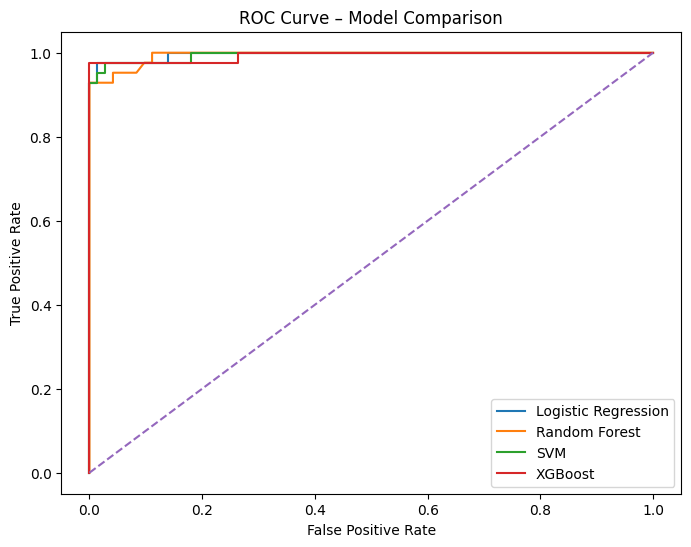

In [6]:
#roc curve
plt.figure(figsize=(8,6))

for name, prob in [
    ("Logistic Regression", y_prob_lr),
    ("Random Forest", y_prob_rf),
    ("SVM", y_prob_svm),
    ("XGBoost", y_prob_xgb)
]:
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Model Comparison")
plt.legend()
plt.show()

In [7]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_svm),
        roc_auc_score(y_test, y_prob_xgb)
    ]
})

display(results)


,Model,ROC-AUC
0,Logistic Regression,0.996032
1,Random Forest,0.994213
2,SVM,0.994709
3,XGBoost,0.993717


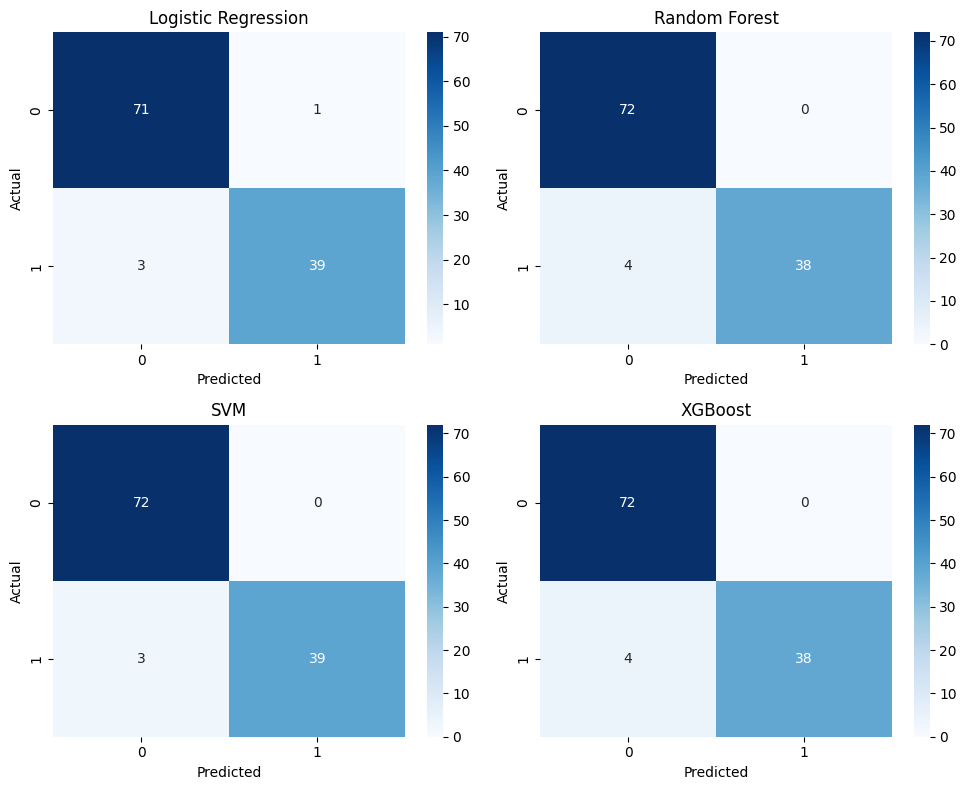

In [9]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# Plot all together
fig, axes = plt.subplots(2, 2, figsize=(10,8))
models = [
    ("Logistic Regression", cm_lr),
    ("Random Forest", cm_rf),
    ("SVM", cm_svm),
    ("XGBoost", cm_xgb)
]
for ax, (title, cm) in zip(axes.flatten(), models):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [12]:
# ================================
# DISEASE PROBABILITY & RISK LEVEL
# ================================

# Probability predictions (Random Forest example)
y_prob = rf.predict_proba(X_test)[:, 1]   # class 1 = disease

# Create ONE clean output table
final_df = pd.DataFrame({
    "Actual Diagnosis": y_test.squeeze(),
    "Predicted Diagnosis": y_pred_rf,
    "Disease Probability (%)": (y_prob * 100).round(2)
})

# Risk level logic
def risk_level(p):
    if p < 30:
        return "Low Risk"
    elif p < 70:
        return "Medium Risk"
    else:
        return "High Risk"

final_df["Risk Level"] = final_df["Disease Probability (%)"].apply(risk_level)

# Display table (screen-friendly)
display(final_df.head(10))

,Actual Diagnosis,Predicted Diagnosis,Disease Probability (%),Risk Level
120,0,0,1.5,Low Risk
250,1,1,100.0,High Risk
375,0,0,33.0,Medium Risk
99,1,1,58.5,Medium Risk
455,0,0,10.5,Low Risk
318,0,0,9.0,Low Risk
39,1,1,61.0,Medium Risk
371,0,0,17.0,Low Risk
98,0,0,0.0,Low Risk
502,0,0,1.0,Low Risk


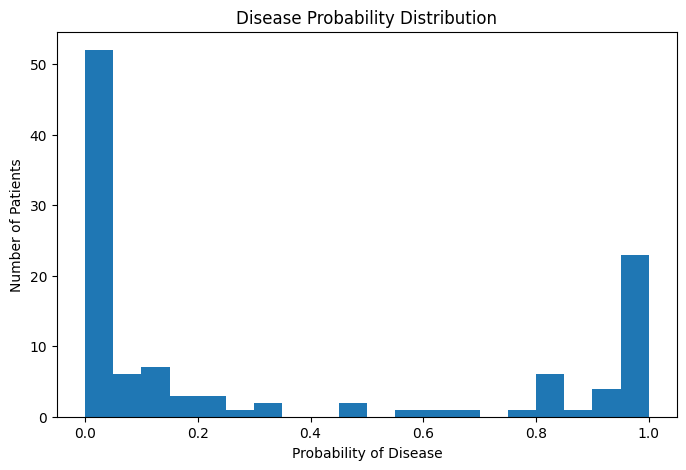

In [13]:
plt.figure(figsize=(8,5))
plt.hist(y_prob, bins=20)
plt.xlabel("Probability of Disease")
plt.ylabel("Number of Patients")
plt.title("Disease Probability Distribution")
plt.show()


In [14]:
sample_patient = X_test[0].reshape(1, -1)

sample_prob = rf.predict_proba(sample_patient)

print(f"Probability of NO disease: {sample_prob[0][0]*100:.2f}%")
print(f"Probability of disease: {sample_prob[0][1]*100:.2f}%")


Probability of NO disease: 98.50%
Probability of disease: 1.50%


In [15]:
import numpy as np

# Bootstrap confidence interval
def confidence_interval(probs, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(probs, size=len(probs), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100 - (100-ci)/2)
    return lower, upper

ci_low, ci_high = confidence_interval(y_prob_rf)

print(f"Average Disease Probability: {np.mean(y_prob_rf)*100:.2f}%")
print(f"{95}% Confidence Interval: [{ci_low*100:.2f}%, {ci_high*100:.2f}%]")


Average Disease Probability: 34.92%
95% Confidence Interval: [26.87%, 42.81%]


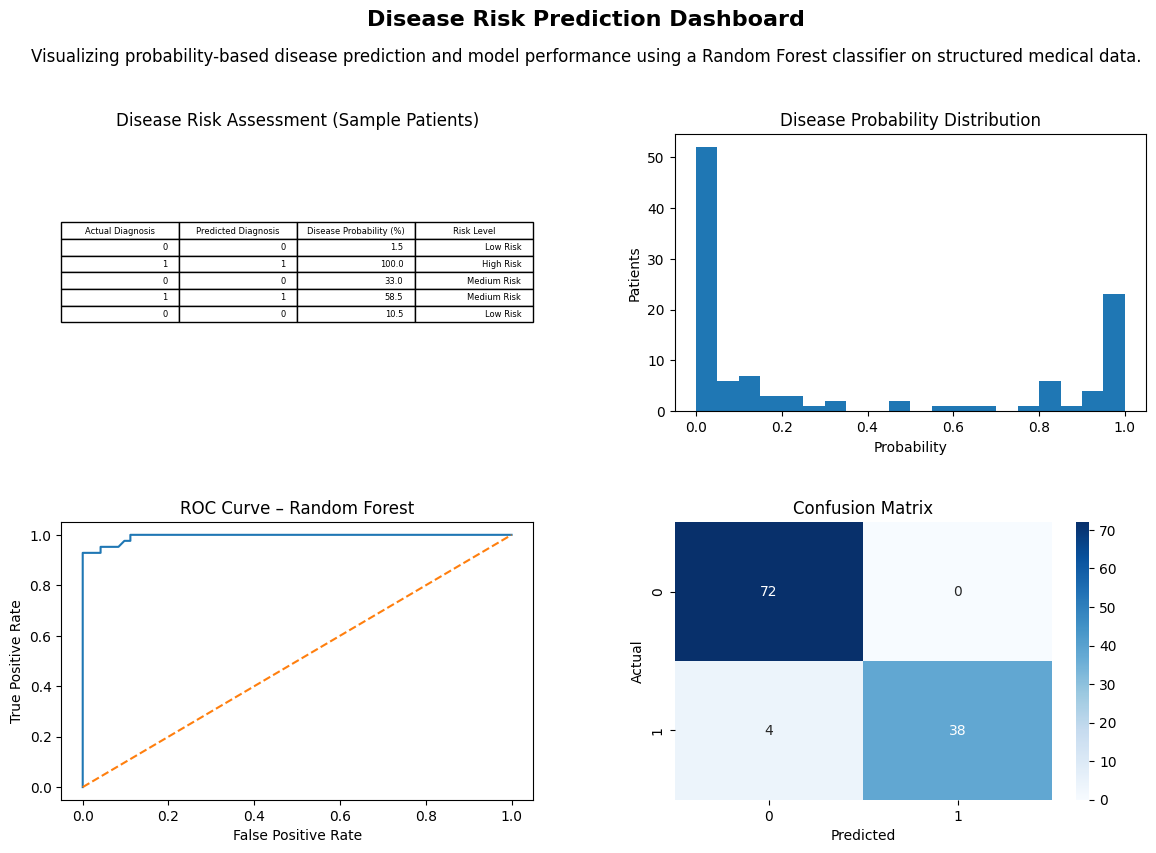

In [20]:
fig = plt.figure(figsize=(14,9))
# Main title (bold)
fig.text(
    0.5, 0.97,
    "Disease Risk Prediction Dashboard",
    ha="center",
    fontsize=16,
    fontweight="bold"
)

# Subtitle (normal)
fig.text(
    0.5, 0.93,
    "Visualizing probability-based disease prediction and model performance "
    "using a Random Forest classifier on structured medical data.",
    ha="center",
    fontsize=12
)

gs = fig.add_gridspec(
    2, 2,
    top=0.85,
    hspace=0.4,
    wspace=0.3
)

# Table
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis("off")
ax1.set_title("Disease Risk Assessment (Sample Patients)")
ax1.table(
    cellText=final_df.head(5).values,
    colLabels=final_df.columns,
    loc="center"
)

# Probability Distribution
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(y_prob_rf, bins=20)
ax2.set_title("Disease Probability Distribution")
ax2.set_xlabel("Probability")
ax2.set_ylabel("Patients")

# -------------------------------
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(fpr, tpr)
ax3.plot([0,1], [0,1], "--")
ax3.set_title("ROC Curve – Random Forest")
ax3.set_xlabel("False Positive Rate")
ax3.set_ylabel("True Positive Rate")

# -------------------------------
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
ax4 = fig.add_subplot(gs[1, 1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax4)
ax4.set_title("Confusion Matrix")
ax4.set_xlabel("Predicted")
ax4.set_ylabel("Actual")
plt.show()

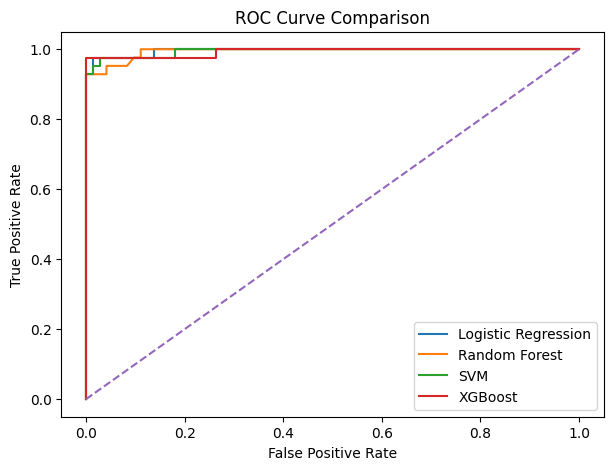

In [17]:
plt.figure(figsize=(7,5))

for name, prob in [
    ("Logistic Regression", y_prob_lr),
    ("Random Forest", y_prob_rf),
    ("SVM", y_prob_svm),
    ("XGBoost", y_prob_xgb)
]:
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
